# Head

In [1]:
import pandas as pd
from pathlib import Path
home = Path.home()

# models = ['gemma3', 'llama4', 'qwen3']
models = ['gemma3', 'llama4']

# suffixes = None
suffixes = '_sent_shuffle'
# suffixes = '_tail'
if suffixes is not None:
    csv_files = [home / f'projects/TLDR/data/paper_html_10.1038/abs_annotation/generated_annotations/{model}{suffixes}.txt' for model in models]
else:
    csv_files = [home / f'projects/TLDR/data/paper_html_10.1038/abs_annotation/generated_annotations/{model}.txt' for model in models]

df = pd.read_csv(home / 'projects/TLDR/data/paper_html_10.1038/abs_annotation/test.tsv', sep='\t')
for model, csv_file in zip(models, csv_files):
    single_df = pd.read_csv(csv_file, sep='\t', header=None, names=[model])
    df = df.join(single_df)

for index in pd.read_csv(home / "projects/TLDR/description/invalid_entry_in_test.txt", sep='\t', header=None).values.flatten().tolist():
    df = df.drop(index-2)  # Adjusting for zero-based index
df

,doi,paper_id,abstract,annotation,gemma3,llama4
0,10.1073/pnas.91.7.2757,107202074,The origin and taxonomic status of domesticate...,A demonstration that cattle have been domestic...,This reference reports on phylogenetic relatio...,These results provide evidence that modern cat...
1,10.1093/genetics/154.4.1785,83366887,Abstract The domestic pig originates from the ...,Evidence is presented for independent domestic...,This study demonstrates that European domestic...,These findings provide evidence for independen...
2,10.1073/pnas.96.16.9252,122095374,We previously mapped a quantitative trait locu...,This paper shows how the identity-by-descent a...,This reference details a fine-mapping strategy...,The authors fine-map a QTL for milk fat percen...
3,10.1101/gr.10.2.220,100831446,A genome-wide linkage disequilibrium (LD) map ...,The pattern of linkage disequilibrium (LD) acr...,This paper reports high levels of linkage dise...,This study is among the first to examine the e...
4,10.1126/science.8134840,17452622,The European wild boar was crossed with the do...,The first paper to show the use of divergent i...,This work describes a QTL mapping study of a w...,This study mapped genetic loci associated with...
...,...,...,...,...,...,...
35631,10.2337/db08-1168,4860455,OBJECTIVE—Regulatory T-cells (Tregs) have cata...,This article describes the good manufacturing ...,This work shows that Tregs from type 1 diabeti...,This study highlights the challenges of transl...
35632,10.1126/science.aar3246,4860145,Engineering cytokine-receptor pairs Interleuki...,This study reports the generation of an orthog...,This study demonstrates that engineered IL-2 r...,These findings suggest that engineering cytoki...
35633,10.1126/science.aad2791,62290395,T cells target peptide combos One of the endur...,This article shows that some diabetogenic T ce...,This study identified that autoreactive T cell...,T cells recognize a unique type of antigen tha...
35634,10.1073/pnas.1902566116,82979762,Polymorphic HLAs form the primary immune barri...,This article describes the development of gene...,This report describes a novel genome editing a...,This study demonstrated that human ESCs and iP...


# Load publication venue and year from MAG

In [2]:
import pickle
print("Loading doi_mag_pid_dict...")
with open(home / "projects/TLDR/data/doi_mag_pid_dict.pkl", "rb") as f:
    doi_mag_pid_dict = pickle.load(f)
    print("doi_mag_pid_dict loaded.")

df['mag_pid'] = df['doi'].map(doi_mag_pid_dict)
df = df.dropna(subset=['mag_pid'])
df.loc[:, 'mag_pid'] = df['mag_pid'].apply(lambda x: x.split(';')[0] if isinstance(x, str) else x)
df.loc[:, 'mag_pid'] = df['mag_pid'].astype(int)
display(df)

Loading doi_mag_pid_dict...
doi_mag_pid_dict loaded.


,doi,paper_id,abstract,annotation,gemma3,llama4,mag_pid
0,10.1073/pnas.91.7.2757,107202074,The origin and taxonomic status of domesticate...,A demonstration that cattle have been domestic...,This reference reports on phylogenetic relatio...,These results provide evidence that modern cat...,2005395185
1,10.1093/genetics/154.4.1785,83366887,Abstract The domestic pig originates from the ...,Evidence is presented for independent domestic...,This study demonstrates that European domestic...,These findings provide evidence for independen...,2110049233
2,10.1073/pnas.96.16.9252,122095374,We previously mapped a quantitative trait locu...,This paper shows how the identity-by-descent a...,This reference details a fine-mapping strategy...,The authors fine-map a QTL for milk fat percen...,2082900742
3,10.1101/gr.10.2.220,100831446,A genome-wide linkage disequilibrium (LD) map ...,The pattern of linkage disequilibrium (LD) acr...,This paper reports high levels of linkage dise...,This study is among the first to examine the e...,2103106090
4,10.1126/science.8134840,17452622,The European wild boar was crossed with the do...,The first paper to show the use of divergent i...,This work describes a QTL mapping study of a w...,This study mapped genetic loci associated with...,2045457895
...,...,...,...,...,...,...,...
35631,10.2337/db08-1168,4860455,OBJECTIVE—Regulatory T-cells (Tregs) have cata...,This article describes the good manufacturing ...,This work shows that Tregs from type 1 diabeti...,This study highlights the challenges of transl...,2137227986
35632,10.1126/science.aar3246,4860145,Engineering cytokine-receptor pairs Interleuki...,This study reports the generation of an orthog...,This study demonstrates that engineered IL-2 r...,These findings suggest that engineering cytoki...,2789780246
35633,10.1126/science.aad2791,62290395,T cells target peptide combos One of the endur...,This article shows that some diabetogenic T ce...,This study identified that autoreactive T cell...,T cells recognize a unique type of antigen tha...,2266478788
35634,10.1073/pnas.1902566116,82979762,Polymorphic HLAs form the primary immune barri...,This article describes the development of gene...,This report describes a novel genome editing a...,This study demonstrated that human ESCs and iP...,2943378944


In [3]:
MAG_paper_df = pd.read_parquet(home / 'projects/TLDR/data/MAG_paper.parquet')
df = df.merge(MAG_paper_df[['VenueID', 'Year']], left_on='mag_pid', right_index=True, how='inner')
df.rename(columns={'VenueID': 'mag_vid', 'Year': 'year'}, inplace=True)
display(df)

,doi,paper_id,abstract,annotation,gemma3,llama4,mag_pid,mag_vid,year
0,10.1073/pnas.91.7.2757,107202074,The origin and taxonomic status of domesticate...,A demonstration that cattle have been domestic...,This reference reports on phylogenetic relatio...,These results provide evidence that modern cat...,2005395185,125754415,1994
1,10.1093/genetics/154.4.1785,83366887,Abstract The domestic pig originates from the ...,Evidence is presented for independent domestic...,This study demonstrates that European domestic...,These findings provide evidence for independen...,2110049233,65932378,2000
2,10.1073/pnas.96.16.9252,122095374,We previously mapped a quantitative trait locu...,This paper shows how the identity-by-descent a...,This reference details a fine-mapping strategy...,The authors fine-map a QTL for milk fat percen...,2082900742,125754415,1999
3,10.1101/gr.10.2.220,100831446,A genome-wide linkage disequilibrium (LD) map ...,The pattern of linkage disequilibrium (LD) acr...,This paper reports high levels of linkage dise...,This study is among the first to examine the e...,2103106090,43092948,2000
4,10.1126/science.8134840,17452622,The European wild boar was crossed with the do...,The first paper to show the use of divergent i...,This work describes a QTL mapping study of a w...,This study mapped genetic loci associated with...,2045457895,3880285,1994
...,...,...,...,...,...,...,...,...,...
35631,10.2337/db08-1168,4860455,OBJECTIVE—Regulatory T-cells (Tregs) have cata...,This article describes the good manufacturing ...,This work shows that Tregs from type 1 diabeti...,This study highlights the challenges of transl...,2137227986,129060628,2009
35632,10.1126/science.aar3246,4860145,Engineering cytokine-receptor pairs Interleuki...,This study reports the generation of an orthog...,This study demonstrates that engineered IL-2 r...,These findings suggest that engineering cytoki...,2789780246,3880285,2018
35633,10.1126/science.aad2791,62290395,T cells target peptide combos One of the endur...,This article shows that some diabetogenic T ce...,This study identified that autoreactive T cell...,T cells recognize a unique type of antigen tha...,2266478788,3880285,2016
35634,10.1073/pnas.1902566116,82979762,Polymorphic HLAs form the primary immune barri...,This article describes the development of gene...,This report describes a novel genome editing a...,This study demonstrated that human ESCs and iP...,2943378944,125754415,2019


# Load subject label

In [4]:
label_df = pd.read_parquet(home / 'projects/TLDR/data/cluster_df.parquet')
label_df

,Scopus_label,movMF_label,movMF_distance,x_val,y_val,kmeans_label,kmeans_distance,skm_label,skm_distance,spectral_label,n2v_kmeans_label,cm_kmeans_label,gnn_kmeans_label,bert_kmeans_label
202381698,Multidisciplinary,22,0.445886,-67.928200,15.572327,17,0.628846,20,0.444711,24,3,21,0,0
137773608,Multidisciplinary,22,0.590942,-68.405334,-55.633186,17,0.735654,20,0.559494,24,20,21,0,3
125754415,Multidisciplinary,22,0.574571,-68.448853,-55.613579,17,0.705024,20,0.550081,24,20,21,0,0
3880285,Multidisciplinary,23,0.618842,-68.407288,-55.634430,8,0.724859,17,0.610582,24,20,21,0,3
111155417,Chemistry,23,0.220853,-54.506985,-61.217068,11,0.495787,12,0.198758,14,4,24,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2764485818,Medicine,21,0.268070,-28.969574,34.819569,18,0.542531,14,0.251015,8,18,1,19,1
83454320,Arts and Humanities,25,0.034777,78.609909,31.736822,13,0.251599,3,0.056642,21,5,1,14,1
16507453,Arts and Humanities,6,0.113656,89.206772,17.625090,13,0.307089,3,0.128660,21,5,1,14,1
121509672,Agricultural and Biological Sciences,5,0.179111,-36.757057,-0.591017,21,0.430040,16,0.207435,10,5,1,10,1


In [5]:
df = df.merge(label_df[['kmeans_label', 'Scopus_label']], left_on='mag_vid', right_index=True, how='inner')
df.rename(columns={'kmeans_label': 'p2v_label', 'Scopus_label': 'scopus_label'}, inplace=True)
df

,doi,paper_id,abstract,annotation,gemma3,llama4,mag_pid,mag_vid,year,p2v_label,scopus_label
0,10.1073/pnas.91.7.2757,107202074,The origin and taxonomic status of domesticate...,A demonstration that cattle have been domestic...,This reference reports on phylogenetic relatio...,These results provide evidence that modern cat...,2005395185,125754415,1994,17,Multidisciplinary
1,10.1093/genetics/154.4.1785,83366887,Abstract The domestic pig originates from the ...,Evidence is presented for independent domestic...,This study demonstrates that European domestic...,These findings provide evidence for independen...,2110049233,65932378,2000,17,"Biochemistry, Genetics and Molecular Biology"
2,10.1073/pnas.96.16.9252,122095374,We previously mapped a quantitative trait locu...,This paper shows how the identity-by-descent a...,This reference details a fine-mapping strategy...,The authors fine-map a QTL for milk fat percen...,2082900742,125754415,1999,17,Multidisciplinary
3,10.1101/gr.10.2.220,100831446,A genome-wide linkage disequilibrium (LD) map ...,The pattern of linkage disequilibrium (LD) acr...,This paper reports high levels of linkage dise...,This study is among the first to examine the e...,2103106090,43092948,2000,17,"Biochemistry, Genetics and Molecular Biology"
4,10.1126/science.8134840,17452622,The European wild boar was crossed with the do...,The first paper to show the use of divergent i...,This work describes a QTL mapping study of a w...,This study mapped genetic loci associated with...,2045457895,3880285,1994,8,Multidisciplinary
...,...,...,...,...,...,...,...,...,...,...,...
35631,10.2337/db08-1168,4860455,OBJECTIVE—Regulatory T-cells (Tregs) have cata...,This article describes the good manufacturing ...,This work shows that Tregs from type 1 diabeti...,This study highlights the challenges of transl...,2137227986,129060628,2009,17,Medicine
35632,10.1126/science.aar3246,4860145,Engineering cytokine-receptor pairs Interleuki...,This study reports the generation of an orthog...,This study demonstrates that engineered IL-2 r...,These findings suggest that engineering cytoki...,2789780246,3880285,2018,8,Multidisciplinary
35633,10.1126/science.aad2791,62290395,T cells target peptide combos One of the endur...,This article shows that some diabetogenic T ce...,This study identified that autoreactive T cell...,T cells recognize a unique type of antigen tha...,2266478788,3880285,2016,8,Multidisciplinary
35634,10.1073/pnas.1902566116,82979762,Polymorphic HLAs form the primary immune barri...,This article describes the development of gene...,This report describes a novel genome editing a...,This study demonstrated that human ESCs and iP...,2943378944,125754415,2019,17,Multidisciplinary


In [41]:
df['p2v_label'].value_counts()

p2v_label
17    18439
8      9625
6      1457
7      1028
4       627
9       611
11      580
22      404
18      363
21      319
12      292
20      121
1        60
3        49
14       32
5        25
24       21
16       21
15       17
2        16
23       16
0        10
19        6
13        5
25        2
Name: count, dtype: int64

In [8]:
df['scopus_label'].value_counts()

scopus_label
Multidisciplinary                               15639
Medicine                                         5262
Immunology and Microbiology                      4146
Biochemistry, Genetics and Molecular Biology     4116
Chemistry                                        1285
Neuroscience                                     1211
Agricultural and Biological Sciences              704
Social Sciences                                   608
Earth and Planetary Sciences                      235
Materials Science                                 179
Psychology                                        156
Physics and Astronomy                             139
Pharmacology, Toxicology and Pharmaceutics        128
Environmental Science                             119
Energy                                             39
Mathematics                                        30
Engineering                                        28
Computer Science                                   24
Nursing        

# Predict subject

## 10-fold cv

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.feature_extraction.text import TfidfVectorizer
import torch
import torch.nn as nn
import torch.optim as optim
import itertools
import warnings
from tqdm import tqdm

class TorchMLP(nn.Module):
    def __init__(self, input_dim, hidden_dim=128, dropout=0.2):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, 1)
        )
    def forward(self, x):
        return self.net(x).squeeze(-1)

def train_torch_mlp(X_train, y_train, X_val, y_val, hidden_dim=128, lr=1e-3, num_epochs=10, batch_size=128):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = TorchMLP(X_train.shape[1], hidden_dim=hidden_dim).to(device)
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)
    X_val_tensor = torch.tensor(X_val, dtype=torch.float32).to(device)
    y_val_tensor = torch.tensor(y_val, dtype=torch.float32).to(device)
    for epoch in range(num_epochs):
        model.train()
        permutation = torch.randperm(X_train_tensor.size(0))
        for i in range(0, X_train_tensor.size(0), batch_size):
            idx = permutation[i:i+batch_size]
            batch_x, batch_y = X_train_tensor[idx], y_train_tensor[idx]
            optimizer.zero_grad()
            logits = model(batch_x)
            loss = criterion(logits, batch_y)
            loss.backward()
            optimizer.step()
    return model

def eval_torch_mlp(model, X, y):
    device = next(model.parameters()).device
    X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
    model.eval()
    with torch.no_grad():
        logits = model(X_tensor)
        preds = (torch.sigmoid(logits) > 0.5).cpu().numpy()
    return {
        'f1': f1_score(y, preds, zero_division=0),
        'accuracy': accuracy_score(y, preds),
        'precision': precision_score(y, preds, zero_division=0),
        'recall': recall_score(y, preds, zero_division=0)
    }

def sample_pairs(df_q, n_pairs, rng):
    """
    - 正样本：随机选择一个有效类别，从该类别中选两个不同paper组成pair
    - 负样本：随机选择一个类别，选择一个paper，再从其他类别中选择一个paper组成pair
    
    参数:
        df_q: 包含数据的DataFrame
        n_pairs: 需要采样的正负样本对数量
        rng: 随机数生成器
        
    返回:
        pos_pairs, neg_pairs: 正样本对和负样本对的列表
    """
    label_groups = {k: v.index.tolist() for k, v in df_q.groupby('p2v_label')} # 按标签分组
    valid_labels = [lbl for lbl, idxs in label_groups.items() if len(idxs) >= 2]  # 找出有效标签（至少有2个样本）
    if not valid_labels:
        raise ValueError("没有找到包含至少2个样本的有效标签")
    all_pairs = set() # 用于跟踪所有生成的对（无论正负）以避免重复
    
    # 生成正样本对
    pos_pairs = []
    attempts_pos = 0
    max_attempts_pos = n_pairs * 10  # 避免无限循
    while len(pos_pairs) < n_pairs and attempts_pos < max_attempts_pos:
        attempts_pos += 1
        # 1. 随机选择一个有效标签
        label = rng.choice(valid_labels)
        papers = label_groups[label]
        if len(papers) < 2:
            continue
        # 2. 从该标签的papers中选择两个不同的paper
        idx1, idx2 = rng.choice(papers, 2, replace=False)
        pair = (min(idx1, idx2), max(idx1, idx2))  # 确保顺序一致性
        # 3. 检查是否重复
        if pair not in all_pairs:
            pos_pairs.append(pair)
            all_pairs.add(pair)
    if len(pos_pairs) < n_pairs:
        warnings.warn(f"只能生成 {len(pos_pairs)}/{n_pairs} 个正样本对")
    
    # 生成负样本对
    neg_pairs = []
    attempts_neg = 0
    max_attempts_neg = n_pairs * 10  # 避免无限循环
    # 创建一个反向映射，用于快速检查索引属于哪个标签
    index_to_label = {}
    for label, indices in label_groups.items():
        for idx in indices:
            index_to_label[idx] = label
    
    while len(neg_pairs) < n_pairs and attempts_neg < max_attempts_neg:
        attempts_neg += 1
        # 1. 随机选择一个标签
        label1 = rng.choice(list(label_groups.keys()))
        if not label_groups[label1]:  # 如果该标签没有样本，跳过
            continue
        # 2. 从该标签中选择一个paper
        idx1 = rng.choice(label_groups[label1])
        # 3. 构建不属于该标签的papers列表
        other_papers = [idx for idx in df_q.index if index_to_label.get(idx) != label1]
        if not other_papers:  # 如果没有其他标签的paper，跳过
            continue
        # 4. 从其他标签的papers中选择一个
        idx2 = rng.choice(other_papers)
        # 确保顺序一致性并检查重复
        pair = (min(idx1, idx2), max(idx1, idx2))
        if pair not in all_pairs:
            neg_pairs.append(pair)
            all_pairs.add(pair)
    if len(neg_pairs) < n_pairs:
        warnings.warn(f"只能生成 {len(neg_pairs)}/{n_pairs} 个负样本对")
        
    return pos_pairs, neg_pairs

metrics_sub_df = pd.DataFrame(columns=[
    'feature', 
    'accuracy_mean', 'accuracy_std',
    'precision_mean', 'precision_std', 
    'recall_mean', 'recall_std',
    'f1_mean', 'f1_std',
])

PAIR_SAMPLE_SIZE = 10000
rng = np.random.default_rng(42)

df_sub = df.reset_index(drop=True)
pos_pairs, neg_pairs = sample_pairs(df_sub, PAIR_SAMPLE_SIZE, rng)
print(f"Sampled {len(pos_pairs)} positive pairs and {len(neg_pairs)} negative pairs.")
pair_samples = (
    [{'idx1': idx1, 'idx2': idx2, 'label': 1} for idx1, idx2 in pos_pairs] +
    [{'idx1': idx1, 'idx2': idx2, 'label': 0} for idx1, idx2 in neg_pairs]
)
pair_samples_df = pd.DataFrame(pair_samples)
metrics_list = []
for feat in ['abstract', 'annotation','gemma3', 'llama4']:
    X = df_sub[feat].astype(str).fillna('').tolist()
    y = pair_samples_df['label'].values
    txt1_list = [X[row['idx1']] for _, row in pair_samples_df.iterrows()]
    txt2_list = [X[row['idx2']] for _, row in pair_samples_df.iterrows()]
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    fold_metrics = []
    for fold_idx, (train_idx, test_idx) in tqdm(enumerate(cv.split(np.zeros(len(y)), y)), total=cv.get_n_splits(), unit='folds', desc=f"Processing {feat}"):
        txt1_train = [txt1_list[j] for j in train_idx]
        txt2_train = [txt2_list[j] for j in train_idx]
        txt1_test = [txt1_list[j] for j in test_idx]
        txt2_test = [txt2_list[j] for j in test_idx]

        vectorizer1 = TfidfVectorizer(max_features=1000, stop_words='english')
        vectorizer2 = TfidfVectorizer(max_features=1000, stop_words='english')
        vec1_train = vectorizer1.fit_transform(txt1_train).toarray()
        vec2_train = vectorizer2.fit_transform(txt2_train).toarray()
        vec1_test = vectorizer1.transform(txt1_test).toarray()
        vec2_test = vectorizer2.transform(txt2_test).toarray()
        X_train = np.concatenate([vec1_train, vec2_train], axis=1)
        X_test = np.concatenate([vec1_test, vec2_test], axis=1)
        y_train = y[train_idx]
        y_test = y[test_idx]
        model = train_torch_mlp(X_train, y_train, X_test, y_test, num_epochs=10)
        metrics = eval_torch_mlp(model, X_test, y_test)
        fold_metrics.append(metrics)
    print(f"Mean F1 score for {feat}: {np.mean([m['f1'] for m in fold_metrics])}")
    print(f"Standard deviation of F1 score for {feat}: {np.std([m['f1'] for m in fold_metrics])}")

    metrics_10_fold = pd.DataFrame(fold_metrics)
    metrics_list.append({
            'feature': feat,
            'accuracy_mean': metrics_10_fold['accuracy'].mean(),
            'accuracy_std': metrics_10_fold['accuracy'].std(),
            'precision_mean': metrics_10_fold['precision'].mean(),
            'precision_std': metrics_10_fold['precision'].std(),
            'recall_mean': metrics_10_fold['recall'].mean(),
            'recall_std': metrics_10_fold['recall'].std(),
            'f1_mean': metrics_10_fold['f1'].mean(),
            'f1_std': metrics_10_fold['f1'].std(),
        })

metrics_sub_df = pd.DataFrame(metrics_list)
display(metrics_sub_df)

Sampled 10000 positive pairs and 10000 negative pairs.


Processing abstract: 100%|█████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.59s/folds]


Mean F1 score for abstract: 0.7613152636945468
Standard deviation of F1 score for abstract: 0.014532715830758054


Processing annotation: 100%|███████████████████████████████████████████████████| 10/10 [00:24<00:00,  2.48s/folds]


Mean F1 score for annotation: 0.7041539962283803
Standard deviation of F1 score for annotation: 0.015020152453215205


Processing gemma3: 100%|███████████████████████████████████████████████████████| 10/10 [00:27<00:00,  2.70s/folds]


Mean F1 score for gemma3: 0.7165072279835548
Standard deviation of F1 score for gemma3: 0.013928923810372484


Processing llama4: 100%|███████████████████████████████████████████████████████| 10/10 [00:24<00:00,  2.47s/folds]

Mean F1 score for llama4: 0.7167345318626148
Standard deviation of F1 score for llama4: 0.009185133151252784


,feature,accuracy_mean,accuracy_std,precision_mean,precision_std,recall_mean,recall_std,f1_mean,f1_std
0,abstract,0.75935,0.012806,0.755011,0.013546,0.7683,0.027725,0.761315,0.015319
1,annotation,0.70095,0.015935,0.696856,0.017330,0.7119,0.020808,0.704154,0.015833
2,gemma3,0.71335,0.013058,0.708843,0.015227,0.7250,0.026783,0.716507,0.014682
3,llama4,0.71495,0.009293,0.712741,0.015927,0.7216,0.024514,0.716735,0.009682


## no cv

In [15]:
import pandas as pd
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm

class ProgressHashingVectorizer(HashingVectorizer):
    """带进度条的HashingVectorizer"""
    def transform(self, X):
        if hasattr(X, '__len__'):
            self.n_samples_ = len(X)
            wrapped_X = tqdm(X, desc="Vectorizing documents", total=self.n_samples_)
            return super().transform(wrapped_X)
        return super().transform(X)

text_features = ['abstract', 'annotation', 'deepseek_v3', 'gemma3', 'llama4', 'qwq']
# 二分类标签：是否为17
y = (df['p2v_label'] == 17).astype(int)  # 17为1，否则为0

results = []
for feat in text_features:
    print(f"Processing feature: {feat}")
    X_text = df[feat].astype(str).fillna('')
    X_train, X_test, y_train, y_test = train_test_split(
        X_text, y, test_size=0.1, random_state=42, stratify=y
    )

    vectorizer = ProgressHashingVectorizer(n_features=2**18, stop_words='english', alternate_sign=False)
    X_train_vec = vectorizer.transform(X_train)
    X_test_vec = vectorizer.transform(X_test)
    clf = MultinomialNB()
    clf.fit(X_train_vec, y_train)
    y_pred = clf.predict(X_test_vec)

    res = {
        'feature': feat,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, zero_division=0),
        'recall': recall_score(y_test, y_pred, zero_division=0),
        'f1': f1_score(y_test, y_pred, zero_division=0),
    }
    print(
        f"Feature: {feat} | "
        f"Accuracy: {res['accuracy']:.4f} | "
        f"Precision: {res['precision']:.4f} | "
        f"Recall: {res['recall']:.4f} | "
        f"F1: {res['f1']:.4f}"
    )
    results.append(res)

results_df = pd.DataFrame(results)
results_df

Processing feature: abstract


Vectorizing documents: 100%|█████████████████████████████████████████████| 3415/3415 [00:00<00:00, 21465.83it/s]


Feature: abstract | Accuracy: 0.6972 | Precision: 0.6540 | Recall: 0.9328 | F1: 0.7689
Processing feature: annotation


Vectorizing documents: 100%|████████████████████████████████████████████| 3415/3415 [00:00<00:00, 137783.39it/s]


Feature: annotation | Accuracy: 0.6442 | Precision: 0.6150 | Recall: 0.9121 | F1: 0.7347
Processing feature: deepseek_v3


Vectorizing documents: 100%|█████████████████████████████████████████████| 3415/3415 [00:00<00:00, 73381.46it/s]


Feature: deepseek_v3 | Accuracy: 0.6656 | Precision: 0.6333 | Recall: 0.9046 | F1: 0.7450
Processing feature: gemma3


Vectorizing documents: 100%|████████████████████████████████████████████| 3415/3415 [00:00<00:00, 110159.96it/s]


Feature: gemma3 | Accuracy: 0.6723 | Precision: 0.6389 | Recall: 0.9040 | F1: 0.7487
Processing feature: llama4


Vectorizing documents: 100%|█████████████████████████████████████████████| 3415/3415 [00:00<00:00, 84019.43it/s]


Feature: llama4 | Accuracy: 0.6624 | Precision: 0.6299 | Recall: 0.9084 | F1: 0.7439
Processing feature: qwq


Vectorizing documents: 100%|█████████████████████████████████████████████| 3415/3415 [00:00<00:00, 44519.71it/s]

Feature: qwq | Accuracy: 0.6685 | Precision: 0.6364 | Recall: 0.9008 | F1: 0.7458


,feature,accuracy,precision,recall,f1
0,abstract,0.697218,0.653992,0.932755,0.768887
1,annotation,0.644217,0.614991,0.912148,0.734658
2,deepseek_v3,0.665593,0.633257,0.904555,0.744975
3,gemma3,0.672328,0.638942,0.904013,0.748709
4,llama4,0.662372,0.629936,0.908351,0.743948
5,qwq,0.668521,0.636398,0.900759,0.745846


# Predict year

In [7]:
df['year'].describe()

count    34146.000000
mean      2006.680724
std          9.105688
min       1887.000000
25%       2001.000000
50%       2007.000000
75%       2014.000000
max       2022.000000
Name: year, dtype: float64

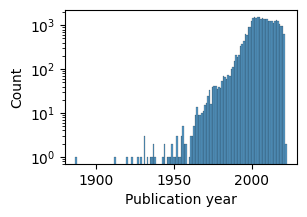

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(3, 2))
sns.histplot(df, x='year', stat='count', discrete=True)
plt.xlabel('Publication year')
plt.yscale('log')
plt.ylabel('Count')
plt.show()

## 10-fold cv

In [9]:
import pandas as pd
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm

class ProgressHashingVectorizer(HashingVectorizer):
    """带进度条的HashingVectorizer"""
    def transform(self, X):
        if hasattr(X, '__len__'):
            self.n_samples_ = len(X)
            wrapped_X = tqdm(X, desc="Vectorizing documents", total=self.n_samples_)
            return super().transform(wrapped_X)
        return super().transform(X)

# 指标: Accuracy, Precision, Recall, F1
scoring = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'F1': make_scorer(f1_score)
}

# text_features = ['abstract', 'annotation', 'deepseek_v3', 'gemma3', 'llama4', 'qwq']
text_features = models + ['annotation', 'abstract']
y = (df['year'] >= 2008).astype(int)

cv = KFold(n_splits=10, shuffle=True, random_state=42)

results = []
for feat in text_features:
    print(f"Processing feature: {feat}")
    X_text = df[feat].astype(str).fillna('')
    vectorizer = ProgressHashingVectorizer(n_features=2**20, stop_words='english', alternate_sign=False)
    X = vectorizer.transform(X_text)
    model = MultinomialNB()
    scores = cross_validate(model, X, y, cv=cv, scoring=scoring, n_jobs=-1, verbose=1, return_train_score=False)
    res = {
        'feature': feat,
        'Accuracy_mean': scores['test_Accuracy'].mean(),
        'Accuracy_std': scores['test_Accuracy'].std(),
        'Precision_mean': scores['test_Precision'].mean(),
        'Precision_std': scores['test_Precision'].std(),
        'Recall_mean': scores['test_Recall'].mean(),
        'Recall_std': scores['test_Recall'].std(),
        'F1_mean': scores['test_F1'].mean(),
        'F1_std': scores['test_F1'].std(),
    }
    print(
        f"Feature: {feat} | "
        f"Accuracy: {res['Accuracy_mean']:.4f}±{res['Accuracy_std']:.4f} | "
        f"F1: {res['F1_mean']:.4f}±{res['F1_std']:.4f}"
    )
    results.append(res)

results_df = pd.DataFrame(results)
display(results_df)

Processing feature: gemma3


Vectorizing documents:   0%|                                                                                                            | 0/34146 [00:00<?, ?it/s]

Vectorizing documents: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 34146/34146 [00:00<00:00, 89301.78it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 256 concurrent workers.
/home/zqlyu2/.local/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    4.0s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.0s finished


Feature: gemma3 | Accuracy: 0.7049±0.0074 | F1: 0.6446±0.0089
Processing feature: llama4


Vectorizing documents: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 34146/34146 [00:00<00:00, 76306.55it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 256 concurrent workers.
/home/zqlyu2/.local/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    1.0s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.0s finished


Feature: llama4 | Accuracy: 0.7020±0.0086 | F1: 0.6547±0.0101
Processing feature: annotation


Vectorizing documents: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 34146/34146 [00:00<00:00, 111202.33it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 256 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.6s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.7s finished


Feature: annotation | Accuracy: 0.7161±0.0090 | F1: 0.6678±0.0120
Processing feature: abstract


Vectorizing documents: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 34146/34146 [00:02<00:00, 16993.84it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 256 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.6s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.7s finished


Feature: abstract | Accuracy: 0.7542±0.0080 | F1: 0.7063±0.0094


,feature,Accuracy_mean,Accuracy_std,Precision_mean,Precision_std,Recall_mean,Recall_std,F1_mean,F1_std
0,gemma3,0.704856,0.007369,0.771654,0.011675,0.553764,0.014894,0.644592,0.008896
1,llama4,0.701956,0.008589,0.744273,0.012986,0.584601,0.013100,0.654728,0.010091
2,annotation,0.716131,0.009039,0.768938,0.013663,0.590483,0.016425,0.667834,0.011960
3,abstract,0.754203,0.008020,0.836492,0.011048,0.611367,0.014414,0.706276,0.009402


## no cv

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tqdm import tqdm

class ProgressHashingVectorizer(HashingVectorizer):
    """带进度条的HashingVectorizer"""
    def transform(self, X):
        if hasattr(X, '__len__'):
            self.n_samples_ = len(X)
            wrapped_X = tqdm(X, desc="Vectorizing documents", total=self.n_samples_)
            return super().transform(wrapped_X)
        return super().transform(X)

text_features = ['abstract', 'annotation', 'deepseek_v3', 'gemma3', 'llama4', 'qwq']
y = df['year'].astype(int)  # 年份作为连续变量回归

results = []
for feat in text_features:
    print(f"Processing feature: {feat}")
    X_text = df[feat].astype(str).fillna('')
    X_train, X_test, y_train, y_test = train_test_split(
        X_text, y, test_size=0.1, random_state=42
    )

    vectorizer = ProgressHashingVectorizer(n_features=2**18, stop_words='english', alternate_sign=False)
    X_train_vec = vectorizer.transform(X_train)
    X_test_vec = vectorizer.transform(X_test)
    model = Ridge(alpha=1.0)
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)

    res = {
        'feature': feat,
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred),
    }
    print(
        f"Feature: {feat} | "
        f"MAE: {res['MAE']:.4f} | "
        f"R2: {res['R2']:.4f}"
    )
    results.append(res)

results_df = pd.DataFrame(results)
results_df

Processing feature: abstract


Vectorizing documents: 100%|█████████████████████████████████████████████| 3415/3415 [00:00<00:00, 22020.20it/s]


Feature: abstract | MAE: 4.2865 | R2: 0.5755
Processing feature: annotation


Vectorizing documents: 100%|████████████████████████████████████████████| 3415/3415 [00:00<00:00, 130228.28it/s]


Feature: annotation | MAE: 5.5461 | R2: 0.3061
Processing feature: deepseek_v3


Vectorizing documents: 100%|█████████████████████████████████████████████| 3415/3415 [00:00<00:00, 77554.96it/s]


Feature: deepseek_v3 | MAE: 5.0521 | R2: 0.4281
Processing feature: gemma3


Vectorizing documents: 100%|████████████████████████████████████████████| 3415/3415 [00:00<00:00, 120217.45it/s]


Feature: gemma3 | MAE: 5.5035 | R2: 0.3244
Processing feature: llama4


Vectorizing documents: 100%|█████████████████████████████████████████████| 3415/3415 [00:00<00:00, 54197.36it/s]


Feature: llama4 | MAE: 5.5231 | R2: 0.3139
Processing feature: qwq


Vectorizing documents: 100%|█████████████████████████████████████████████| 3415/3415 [00:00<00:00, 44297.08it/s]


Feature: qwq | MAE: 5.0755 | R2: 0.4131


,feature,MAE,MSE,R2
0,abstract,4.286524,34.042876,0.575475
1,annotation,5.546063,55.646234,0.306074
2,deepseek_v3,5.052078,45.857851,0.428139
3,gemma3,5.503463,54.177417,0.324391
4,llama4,5.523119,55.020432,0.313878
5,qwq,5.075490,47.060866,0.413137


# Predict title

## Fetch titles

In [10]:
import pandas as pd
from sqlalchemy import create_engine
from tqdm import tqdm

MYSQL_HOST = '144.214.39.113'
MYSQL_USER = 'key'
MYSQL_PASS = 'Keydge11'
MYSQL_DB = 'keydge'

engine = create_engine(f'mysql+pymysql://{MYSQL_USER}:{MYSQL_PASS}@{MYSQL_HOST}/{MYSQL_DB}?charset=utf8mb4')

paper_ids = df['paper_id'].unique().tolist()
BATCH_SIZE = 500  # 每批查多少条，可调大或调小

results = []
# 用tqdm显示批次进度和预计完成时间
for i in tqdm(range(0, len(paper_ids), BATCH_SIZE), desc="Querying titles", unit="batch"):
    batch = paper_ids[i:i+BATCH_SIZE]
    id_str = ','.join(str(int(pid)) for pid in batch)
    sql = f"SELECT paper_id, title FROM paper_bib WHERE paper_id IN ({id_str})"
    batch_df = pd.read_sql(sql, engine)
    results.append(batch_df)

# 合并所有批次的查询结果
paper_title_df = pd.concat(results, ignore_index=True)
display(paper_title_df)

Querying titles: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 57/57 [00:00<00:00, 160.05batch/s]


,paper_id,title
0,1353153,Efficient Generation of a Hepatitis B Virus Cy...
1,1634910,"Structure of Hjc, a Holliday junction resolvas..."
2,1655469,From Complete Genomes to Measures of Substitut...
3,1778349,Regulation of the Proinflammatory Effects of F...
4,2550721,Differential requirement for p19ARF in the p53...
...,...,...
28005,83433077,Revisiting IL-2: Biology and therapeutic prosp...
28006,104021261,Systems-level analysis of mechanisms regulatin...
28007,104393236,siRNA nanoparticles targeting CaMKIIγ in lesio...
28008,123181209,Immunotherapy of autoimmune encephalomyelitis ...


In [ ]:
paper_title_df.to_parquet(home / 'projects/TLDR/data/paper_title.parquet', index=False)

## Load titles

In [7]:
paper_title_df = pd.read_parquet(home / 'projects/TLDR/data/paper_title.parquet')
df = df.merge(paper_title_df, on='paper_id', how='left')
display(df)

,doi,paper_id,abstract,annotation,gemma3,llama4,mag_pid,mag_vid,year,p2v_label,scopus_label,title
0,10.1073/pnas.91.7.2757,107202074,The origin and taxonomic status of domesticate...,A demonstration that cattle have been domestic...,This reference reports on phylogenetic relatio...,These results provide evidence that modern cat...,2005395185,125754415,1994,17,Multidisciplinary,Evidence for two independent domestications of...
1,10.1093/genetics/154.4.1785,83366887,Abstract The domestic pig originates from the ...,Evidence is presented for independent domestic...,This study demonstrates that European domestic...,These findings provide evidence for independen...,2110049233,65932378,2000,17,"Biochemistry, Genetics and Molecular Biology",The Origin of the Domestic Pig: Independent Do...
2,10.1073/pnas.96.16.9252,122095374,We previously mapped a quantitative trait locu...,This paper shows how the identity-by-descent a...,This reference details a fine-mapping strategy...,The authors fine-map a QTL for milk fat percen...,2082900742,125754415,1999,17,Multidisciplinary,Fine-mapping of quantitative trait loci by ide...
3,10.1101/gr.10.2.220,100831446,A genome-wide linkage disequilibrium (LD) map ...,The pattern of linkage disequilibrium (LD) acr...,This paper reports high levels of linkage dise...,This study is among the first to examine the e...,2103106090,43092948,2000,17,"Biochemistry, Genetics and Molecular Biology",Extensive Genome-wide Linkage Disequilibrium i...
4,10.1126/science.8134840,17452622,The European wild boar was crossed with the do...,The first paper to show the use of divergent i...,This work describes a QTL mapping study of a w...,This study mapped genetic loci associated with...,2045457895,3880285,1994,8,Multidisciplinary,Genetic mapping of quantitative trait loci for...
...,...,...,...,...,...,...,...,...,...,...,...,...
34141,10.2337/db08-1168,4860455,OBJECTIVE—Regulatory T-cells (Tregs) have cata...,This article describes the good manufacturing ...,This work shows that Tregs from type 1 diabeti...,This study highlights the challenges of transl...,2137227986,129060628,2009,17,Medicine,Expansion of Human Regulatory T-Cells From Pat...
34142,10.1126/science.aar3246,4860145,Engineering cytokine-receptor pairs Interleuki...,This study reports the generation of an orthog...,This study demonstrates that engineered IL-2 r...,These findings suggest that engineering cytoki...,2789780246,3880285,2018,8,Multidisciplinary,Selective targeting of engineered T cells usin...
34143,10.1126/science.aad2791,62290395,T cells target peptide combos One of the endur...,This article shows that some diabetogenic T ce...,This study identified that autoreactive T cell...,T cells recognize a unique type of antigen tha...,2266478788,3880285,2016,8,Multidisciplinary,Pathogenic CD4 T cells in type 1 diabetes reco...
34144,10.1073/pnas.1902566116,82979762,Polymorphic HLAs form the primary immune barri...,This article describes the development of gene...,This report describes a novel genome editing a...,This study demonstrated that human ESCs and iP...,2943378944,125754415,2019,17,Multidisciplinary,Generation of hypoimmunogenic human pluripoten...


## Generate negative samples

### Use random title of other papers in same subject

In [8]:
import pandas as pd
import numpy as np
from tqdm import tqdm

pos_df = df.copy()

# 标记正样本
pos_df['title_paired'] = True

# 收集负样本
neg_samples = []
rng = np.random.default_rng(42)  # 固定随机种子便于复现

for idx, row in tqdm(pos_df.iterrows(), total=len(pos_df), desc="生成负样本"):
    # 查找同学科标签但不同paper_id的候选title
    candidates = pos_df[(pos_df['p2v_label'] == row['p2v_label']) & (pos_df['paper_id'] != row['paper_id'])]
    if not candidates.empty:
        neg_title = rng.choice(candidates['title'].values)
        neg_row = row.copy()
        neg_row['title'] = neg_title
        neg_row['title_paired'] = False
        neg_samples.append(neg_row)
    else:
        raise ValueError(f"没有找到与行 {idx} 同学科但不同paper_id的候选title。")

neg_df = pd.DataFrame(neg_samples)

# 合并正负样本
title_match_df = pd.concat([pos_df, neg_df], ignore_index=True)

生成负样本:   0%|                                                                       | 0/34146 [00:00<?, ?it/s]

生成负样本: 100%|██████████████████████████████████████████████████████████| 34146/34146 [00:58<00:00, 581.66it/s]


In [9]:
title_match_df[title_match_df['title_paired'] == False]['title'].sample(5).tolist()

['Global Transposon Mutagenesis and a Minimal Mycoplasma Genome',
 'Centuries of intense surface melt on Larsen C Ice Shelf',
 'Restoration of visual function by transplantation of optogenetically engineered photoreceptors',
 'Plasmodium falciparum transmission stages accumulate in the human bone marrow',
 'Coordination of Three Signaling Enzymes by AKAP79, a Mammalian Scaffold Protein']

## Evaluation

In [10]:
title_match_df

,doi,paper_id,abstract,annotation,gemma3,llama4,mag_pid,mag_vid,year,p2v_label,scopus_label,title,title_paired
0,10.1073/pnas.91.7.2757,107202074,The origin and taxonomic status of domesticate...,A demonstration that cattle have been domestic...,This reference reports on phylogenetic relatio...,These results provide evidence that modern cat...,2005395185,125754415,1994,17,Multidisciplinary,Evidence for two independent domestications of...,True
1,10.1093/genetics/154.4.1785,83366887,Abstract The domestic pig originates from the ...,Evidence is presented for independent domestic...,This study demonstrates that European domestic...,These findings provide evidence for independen...,2110049233,65932378,2000,17,"Biochemistry, Genetics and Molecular Biology",The Origin of the Domestic Pig: Independent Do...,True
2,10.1073/pnas.96.16.9252,122095374,We previously mapped a quantitative trait locu...,This paper shows how the identity-by-descent a...,This reference details a fine-mapping strategy...,The authors fine-map a QTL for milk fat percen...,2082900742,125754415,1999,17,Multidisciplinary,Fine-mapping of quantitative trait loci by ide...,True
3,10.1101/gr.10.2.220,100831446,A genome-wide linkage disequilibrium (LD) map ...,The pattern of linkage disequilibrium (LD) acr...,This paper reports high levels of linkage dise...,This study is among the first to examine the e...,2103106090,43092948,2000,17,"Biochemistry, Genetics and Molecular Biology",Extensive Genome-wide Linkage Disequilibrium i...,True
4,10.1126/science.8134840,17452622,The European wild boar was crossed with the do...,The first paper to show the use of divergent i...,This work describes a QTL mapping study of a w...,This study mapped genetic loci associated with...,2045457895,3880285,1994,8,Multidisciplinary,Genetic mapping of quantitative trait loci for...,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68287,10.2337/db08-1168,4860455,OBJECTIVE—Regulatory T-cells (Tregs) have cata...,This article describes the good manufacturing ...,This work shows that Tregs from type 1 diabeti...,This study highlights the challenges of transl...,2137227986,129060628,2009,17,Medicine,Experience and Activity-Dependent Maturation o...,False
68288,10.1126/science.aar3246,4860145,Engineering cytokine-receptor pairs Interleuki...,This study reports the generation of an orthog...,This study demonstrates that engineered IL-2 r...,These findings suggest that engineering cytoki...,2789780246,3880285,2018,8,Multidisciplinary,A Clonogenic Bone Marrow Progenitor Specific f...,False
68289,10.1126/science.aad2791,62290395,T cells target peptide combos One of the endur...,This article shows that some diabetogenic T ce...,This study identified that autoreactive T cell...,T cells recognize a unique type of antigen tha...,2266478788,3880285,2016,8,Multidisciplinary,Single-cell RNA-seq highlights intratumoral he...,False
68290,10.1073/pnas.1902566116,82979762,Polymorphic HLAs form the primary immune barri...,This article describes the development of gene...,This report describes a novel genome editing a...,This study demonstrated that human ESCs and iP...,2943378944,125754415,2019,17,Multidisciplinary,Iterative fractionation of recycling receptors...,False


### 10-CV

#### LogisticRegression

In [49]:
import pandas as pd
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm

class ProgressHashingVectorizer(HashingVectorizer):
    """带进度条的HashingVectorizer"""
    def transform(self, X):
        if hasattr(X, '__len__'):
            self.n_samples_ = len(X)
            wrapped_X = tqdm(X, desc="Vectorizing documents", total=self.n_samples_)
            return super().transform(wrapped_X)
        return super().transform(X)

# 评价指标
scoring = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'F1': make_scorer(f1_score)
}

text_features = ['abstract', 'annotation', 'deepseek_v3', 'qwen3','gemma3', 'llama4', 'qwq']
y = title_match_df['title_paired'].astype(int)  # 1: 匹配，0: 不匹配

cv = KFold(n_splits=10, shuffle=True, random_state=42)

results = []
for feat in text_features:
    print(f"Processing feature: {feat}")
    # 拼接title和对应的feature
    X_text = (title_match_df['title'].astype(str).fillna('') + ' [SEP] ' + title_match_df[feat].astype(str).fillna(''))
    vectorizer = ProgressHashingVectorizer(n_features=2**20, stop_words='english', alternate_sign=False)
    X = vectorizer.transform(X_text)
    model = LogisticRegression(max_iter=2000, random_state=42)
    scores = cross_validate(model, X, y, cv=cv, scoring=scoring, n_jobs=-1, verbose=1, return_train_score=False)
    res = {
        'feature': feat,
        'Accuracy_mean': scores['test_Accuracy'].mean(),
        'Accuracy_std': scores['test_Accuracy'].std(),
        'Precision_mean': scores['test_Precision'].mean(),
        'Precision_std': scores['test_Precision'].std(),
        'Recall_mean': scores['test_Recall'].mean(),
        'Recall_std': scores['test_Recall'].std(),
        'F1_mean': scores['test_F1'].mean(),
        'F1_std': scores['test_F1'].std(),
    }
    print(
        f"Feature: {feat} | "
        f"Accuracy: {res['Accuracy_mean']:.4f}±{res['Accuracy_std']:.4f} | "
        f"F1: {res['F1_mean']:.4f}±{res['F1_std']:.4f}"
    )
    results.append(res)

results_df = pd.DataFrame(results)
display(results_df)

Processing feature: abstract


Vectorizing documents:   0%|                                                                                                            | 0/68292 [00:00<?, ?it/s]

Vectorizing documents: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 68292/68292 [00:04<00:00, 15976.39it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 256 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    5.3s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.8s finished


Feature: abstract | Accuracy: 0.5499±0.0056 | F1: 0.5498±0.0070
Processing feature: annotation


Vectorizing documents: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 68292/68292 [00:00<00:00, 72535.34it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 256 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    4.2s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.1s finished


Feature: annotation | Accuracy: 0.6618±0.0051 | F1: 0.6569±0.0062
Processing feature: deepseek_v3


Vectorizing documents: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 68292/68292 [00:01<00:00, 46628.61it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 256 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    3.5s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.1s finished


Feature: deepseek_v3 | Accuracy: 0.7557±0.0062 | F1: 0.7537±0.0069
Processing feature: qwen3


Vectorizing documents: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 68292/68292 [00:02<00:00, 32650.61it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 256 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    4.6s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.4s finished


Feature: qwen3 | Accuracy: 0.7139±0.0055 | F1: 0.7124±0.0040
Processing feature: gemma3


Vectorizing documents: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 68292/68292 [00:01<00:00, 64844.09it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 256 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    3.3s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.9s finished


Feature: gemma3 | Accuracy: 0.7577±0.0038 | F1: 0.7544±0.0045
Processing feature: llama4


Vectorizing documents: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 68292/68292 [00:01<00:00, 38042.45it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 256 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    4.6s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.0s finished


Feature: llama4 | Accuracy: 0.6843±0.0058 | F1: 0.6779±0.0066
Processing feature: qwq


Vectorizing documents: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 68292/68292 [00:02<00:00, 30616.49it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 256 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    3.4s remaining:    3.4s


Feature: qwq | Accuracy: 0.6742±0.0061 | F1: 0.6738±0.0057


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.9s finished


,feature,Accuracy_mean,Accuracy_std,Precision_mean,Precision_std,Recall_mean,Recall_std,F1_mean,F1_std
0,abstract,0.549933,0.005592,0.549973,0.007610,0.549904,0.011833,0.549849,0.006991
1,annotation,0.661805,0.005107,0.666455,0.007536,0.647740,0.006525,0.656947,0.006182
2,deepseek_v3,0.755682,0.006233,0.759852,0.007990,0.747601,0.007543,0.753659,0.006902
3,qwen3,0.713920,0.005532,0.716325,0.007133,0.708609,0.008824,0.712379,0.004045
4,gemma3,0.757658,0.003785,0.764547,0.006018,0.744599,0.005684,0.754423,0.004546
5,llama4,0.684282,0.005826,0.691811,0.009807,0.664674,0.006120,0.677939,0.006620
6,qwq,0.674222,0.006091,0.674641,0.006608,0.673095,0.008468,0.673829,0.005692


#### MLP

In [11]:
from sklearnex import patch_sklearn 
patch_sklearn()

import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm
from joblib import Parallel, delayed
import torch
import torch.nn as nn
import torch.optim as optim

def create_tfidf_features(X_title_train, X_content_train, X_title_test, X_content_test, max_features=1000):
    tfidf_title = TfidfVectorizer(max_features=max_features, stop_words='english')
    tfidf_content = TfidfVectorizer(max_features=max_features, stop_words='english')
    # fit only on the training set
    X_title_train_vec = tfidf_title.fit_transform(X_title_train).toarray()
    X_content_train_vec = tfidf_content.fit_transform(X_content_train).toarray()
    X_title_test_vec = tfidf_title.transform(X_title_test).toarray()
    X_content_test_vec = tfidf_content.transform(X_content_test).toarray()
    # Fit and transform title and content separately, adding the diff
    X_train_feat = np.concatenate([X_title_train_vec, X_content_train_vec, X_title_train_vec - X_content_train_vec], axis=1)
    X_test_feat = np.concatenate([X_title_test_vec, X_content_test_vec, X_title_test_vec - X_content_test_vec], axis=1)
    return X_train_feat, X_test_feat

class TorchMLP(nn.Module):
    def __init__(self, input_dim, hidden_dim=128, dropout=0.2):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, 1)
        )
    def forward(self, x):
        return self.net(x).squeeze(-1)

def train_torch_mlp(X_train, y_train, X_val, y_val, hidden_dim=128, lr=1e-3, num_epochs=10, batch_size=128):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = TorchMLP(X_train.shape[1], hidden_dim=hidden_dim).to(device)
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)
    X_val_tensor = torch.tensor(X_val, dtype=torch.float32).to(device)
    y_val_tensor = torch.tensor(y_val, dtype=torch.float32).to(device)
    for epoch in range(num_epochs):
        model.train()
        permutation = torch.randperm(X_train_tensor.size(0))
        for i in range(0, X_train_tensor.size(0), batch_size):
            idx = permutation[i:i+batch_size]
            batch_x, batch_y = X_train_tensor[idx], y_train_tensor[idx]
            optimizer.zero_grad()
            logits = model(batch_x)
            loss = criterion(logits, batch_y)
            loss.backward()
            optimizer.step()
    return model

def eval_torch_mlp(model, X, y):
    device = next(model.parameters()).device
    X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
    model.eval()
    with torch.no_grad():
        logits = model(X_tensor)
        preds = (torch.sigmoid(logits) > 0.5).cpu().numpy()
    return {
        'f1': f1_score(y, preds, zero_division=0),
        'accuracy': accuracy_score(y, preds),
        'precision': precision_score(y, preds, zero_division=0),
        'recall': recall_score(y, preds, zero_division=0)
    }

def run_one_fold(X_title, X_content, y, train_idx, test_idx, max_features=1000):
    import warnings
    warnings.filterwarnings("ignore", category=FutureWarning)
    
    X_title_train, X_title_test = X_title[train_idx].tolist(), X_title[test_idx].tolist()
    X_content_train, X_content_test = X_content[train_idx].tolist(), X_content[test_idx].tolist()
    y_train, y_test = y[train_idx], y[test_idx]
    X_train_feat, X_test_feat = create_tfidf_features(X_title_train, X_content_train, X_title_test, X_content_test, max_features=max_features)
    model = train_torch_mlp(X_train_feat, y_train, X_test_feat, y_test, num_epochs=10)
    metrics = eval_torch_mlp(model, X_test_feat, y_test)
    return {
        'accuracy': metrics['accuracy'],
        'precision': metrics['precision'],
        'recall': metrics['recall'],
        'f1': metrics['f1']
    }

y = title_match_df['title_paired'].astype(int).values
X_title = title_match_df['title'].astype(str).fillna('').values
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
folds = list(cv.split(X_title, y))

results = []
text_features = ['annotation', 'abstract'] + models
for feat in text_features:
    print(f"\nProcessing feature: {feat}")
    X_content = title_match_df[feat].astype(str).fillna('').values
    print(f"  {feat} k-folds running serially...")
    metrics_list = []
    for fold_idx, (train_idx, test_idx) in enumerate(folds):
        metrics = run_one_fold(X_title, X_content, y, train_idx, test_idx)
        metrics_list.append(metrics)

    res = {
        'feature': feat,
        'accuracy_mean': np.mean([m['accuracy'] for m in metrics_list]),
        'accuracy_std': np.std([m['accuracy'] for m in metrics_list]),
        'precision_mean': np.mean([m['precision'] for m in metrics_list]),
        'precision_std': np.std([m['precision'] for m in metrics_list]),
        'recall_mean': np.mean([m['recall'] for m in metrics_list]),
        'recall_std': np.std([m['recall'] for m in metrics_list]),
        'f1_mean': np.mean([m['f1'] for m in metrics_list]),
        'f1_std': np.std([m['f1'] for m in metrics_list]),
    }
    print(
        f"Feature: {feat} | "
        f"Acc: {res['accuracy_mean']:.4f}±{res['accuracy_std']:.4f} | "
        f"Precision: {res['precision_mean']:.4f}±{res['precision_std']:.4f} | "
        f"Recall: {res['recall_mean']:.4f}±{res['recall_std']:.4f} | "
        f"F1: {res['f1_mean']:.4f}±{res['f1_std']:.4f}"
    )
    results.append(res)
results_df = pd.DataFrame(results)
results_df

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)



Processing feature: annotation
  annotation k-folds running serially...
Feature: annotation | Acc: 0.7614±0.0046 | Precision: 0.7598±0.0052 | Recall: 0.7646±0.0103 | F1: 0.7621±0.0055

Processing feature: abstract
  abstract k-folds running serially...
Feature: abstract | Acc: 0.8844±0.0042 | Precision: 0.8716±0.0082 | Recall: 0.9017±0.0059 | F1: 0.8863±0.0038

Processing feature: gemma3
  gemma3 k-folds running serially...
Feature: gemma3 | Acc: 0.8351±0.0035 | Precision: 0.8301±0.0053 | Recall: 0.8427±0.0085 | F1: 0.8363±0.0038

Processing feature: llama4
  llama4 k-folds running serially...
Feature: llama4 | Acc: 0.8126±0.0027 | Precision: 0.8072±0.0061 | Recall: 0.8215±0.0084 | F1: 0.8142±0.0029


,feature,accuracy_mean,accuracy_std,precision_mean,precision_std,recall_mean,recall_std,f1_mean,f1_std
0,annotation,0.761407,0.004650,0.759809,0.005225,0.764570,0.010342,0.762133,0.005513
1,abstract,0.884364,0.004227,0.871597,0.008236,0.901687,0.005883,0.886344,0.003760
2,gemma3,0.835105,0.003455,0.830125,0.005263,0.842734,0.008486,0.836341,0.003825
3,llama4,0.812584,0.002738,0.807215,0.006118,0.821473,0.008438,0.814226,0.002914


### No CV

In [42]:
import pandas as pd
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, Trainer, TrainingArguments
import torch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# 设定设备
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 评价指标
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    return {
        'accuracy': accuracy_score(labels, preds),
        'precision': precision_score(labels, preds),
        'recall': recall_score(labels, preds),
        'f1': f1_score(labels, preds)
    }

class TitlePairDataset(torch.utils.data.Dataset):
    def __init__(self, titles, contents, labels, tokenizer, max_length=128):
        self.encodings = tokenizer(
            titles, contents,
            padding='max_length',
            truncation=True,
            max_length=max_length,
            return_tensors='pt'
        )
        self.labels = torch.tensor(labels, dtype=torch.long)
    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item
    def __len__(self):
        return len(self.labels)

text_features = models + ['annotation', 'abstract']
y = title_match_df['title_paired'].astype(int).values
results = []

model_name = 'distilbert-base-uncased'
tokenizer = DistilBertTokenizerFast.from_pretrained(model_name)

for feat in text_features:
    print(f"\nProcessing feature: {feat}")
    output_dir = home / f'projects/TLDR/evaluation/predict_task/cached_title_distilbert_{feat}' / 'no_cv'
    output_dir_str = str(output_dir)
    X_title = title_match_df['title'].astype(str).fillna('').tolist()
    X_content = title_match_df[feat].astype(str).fillna('').tolist()
    labels = y

    # dataset split
    train_titles, test_titles, train_contents, test_contents, train_labels, test_labels = train_test_split(
        X_title, X_content, labels, test_size=0.2, random_state=42, stratify=labels
    )

    # construct datasets
    train_dataset = TitlePairDataset(train_titles, train_contents, train_labels, tokenizer)
    test_dataset = TitlePairDataset(test_titles, test_contents, test_labels, tokenizer)

    # 新建模型
    model = DistilBertForSequenceClassification.from_pretrained(model_name, num_labels=2).to(device)

    training_args = TrainingArguments(
        output_dir=output_dir_str,
        num_train_epochs=1,
        per_device_train_batch_size=16,
        per_device_eval_batch_size=32,
        eval_strategy='steps',
        eval_steps=200,
        save_strategy='no',
        learning_rate=2e-5,
        logging_steps=50,
        report_to=[],
        load_best_model_at_end=False,
        seed=42
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=test_dataset,
        compute_metrics=compute_metrics,
    )

    trainer.train()
    eval_result = trainer.evaluate()

    # 汇总
    res = {
        'feature': feat,
        'Accuracy': eval_result['eval_accuracy'],
        'Precision': eval_result['eval_precision'],
        'Recall': eval_result['eval_recall'],
        'F1': eval_result['eval_f1'],
    }
    print(
        f"Feature: {feat} | "
        f"Accuracy: {res['Accuracy']:.4f} | "
        f"F1: {res['F1']:.4f}"
    )
    results.append(res)

results_df = pd.DataFrame(results)
display(results_df)


Processing feature: gemma3


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.135600,0.098041,0.967274,0.978842,0.955191,0.966872
400,0.087600,0.080129,0.975108,0.981166,0.968809,0.974948
600,0.087800,0.076666,0.974596,0.973415,0.975838,0.974625
800,0.075500,0.070916,0.976645,0.977974,0.975253,0.976611


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Feature: gemma3 | Accuracy: 0.9763 | F1: 0.9762

Processing feature: llama4


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.192500,0.166034,0.940040,0.955717,0.922829,0.938985
400,0.163000,0.149244,0.947580,0.941499,0.954459,0.947935
600,0.130600,0.129424,0.954975,0.954107,0.955923,0.955014
800,0.132600,0.120594,0.958196,0.963968,0.951970,0.957931


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Feature: llama4 | Accuracy: 0.9581 | F1: 0.9576

Processing feature: annotation


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.246300,0.217543,0.918222,0.934307,0.899692,0.916673
400,0.197800,0.190222,0.928545,0.935686,0.920340,0.927949
600,0.203800,0.176155,0.935134,0.966410,0.901596,0.932879
800,0.176700,0.168881,0.938429,0.953774,0.921511,0.937365


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Feature: annotation | Accuracy: 0.9393 | F1: 0.9383

Processing feature: abstract


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.126900,0.106910,0.963248,0.959611,0.967199,0.963390
400,0.091200,0.082622,0.974742,0.976484,0.972910,0.974694
600,0.064800,0.068250,0.980233,0.984918,0.975399,0.980135
800,0.043700,0.069009,0.979647,0.972451,0.987260,0.979799


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Feature: abstract | Accuracy: 0.9813 | F1: 0.9814


,feature,Accuracy,Precision,Recall,F1
0,gemma3,0.976279,0.978238,0.974228,0.976229
1,llama4,0.958123,0.969815,0.945673,0.957592
2,annotation,0.939307,0.954133,0.922976,0.938295
3,abstract,0.981331,0.978179,0.984624,0.981391
